In [1]:
#Importing the required libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
news_data = pd.read_csv('dataset/OnlineNewsPopularity.csv')

In [3]:
news_data.drop('url',1,inplace=True)

In [4]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 60 columns):
timedelta                         39644 non-null float64
n_tokens_title                    39644 non-null float64
n_tokens_content                  39644 non-null float64
n_unique_tokens                   39644 non-null float64
n_non_stop_words                  39644 non-null float64
n_non_stop_unique_tokens          39644 non-null float64
num_hrefs                         39644 non-null float64
num_self_hrefs                    39644 non-null float64
num_imgs                          39644 non-null float64
num_videos                        39644 non-null float64
average_token_length              39644 non-null float64
num_keywords                      39644 non-null float64
data_channel_is_lifestyle         39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus               39644 non-null float64
data_channel_is_socmed            39

In [5]:
correlation_matrix = news_data.corr()

In [6]:
correlation_matrix['shares'].sort_values(ascending=False)

shares                            1.000000
kw_avg_avg                        0.110413
LDA_03                            0.083771
kw_max_avg                        0.064306
self_reference_avg_sharess        0.057789
self_reference_min_shares         0.055958
self_reference_max_shares         0.047115
num_hrefs                         0.045404
kw_avg_max                        0.044686
kw_min_avg                        0.039551
num_imgs                          0.039388
global_subjectivity               0.031604
kw_avg_min                        0.030406
kw_max_min                        0.030114
abs_title_sentiment_polarity      0.027135
num_videos                        0.023936
title_subjectivity                0.021967
num_keywords                      0.021818
is_weekend                        0.016958
weekday_is_saturday               0.015082
title_sentiment_polarity          0.012772
avg_positive_polarity             0.012142
max_positive_polarity             0.010068
weekday_is_

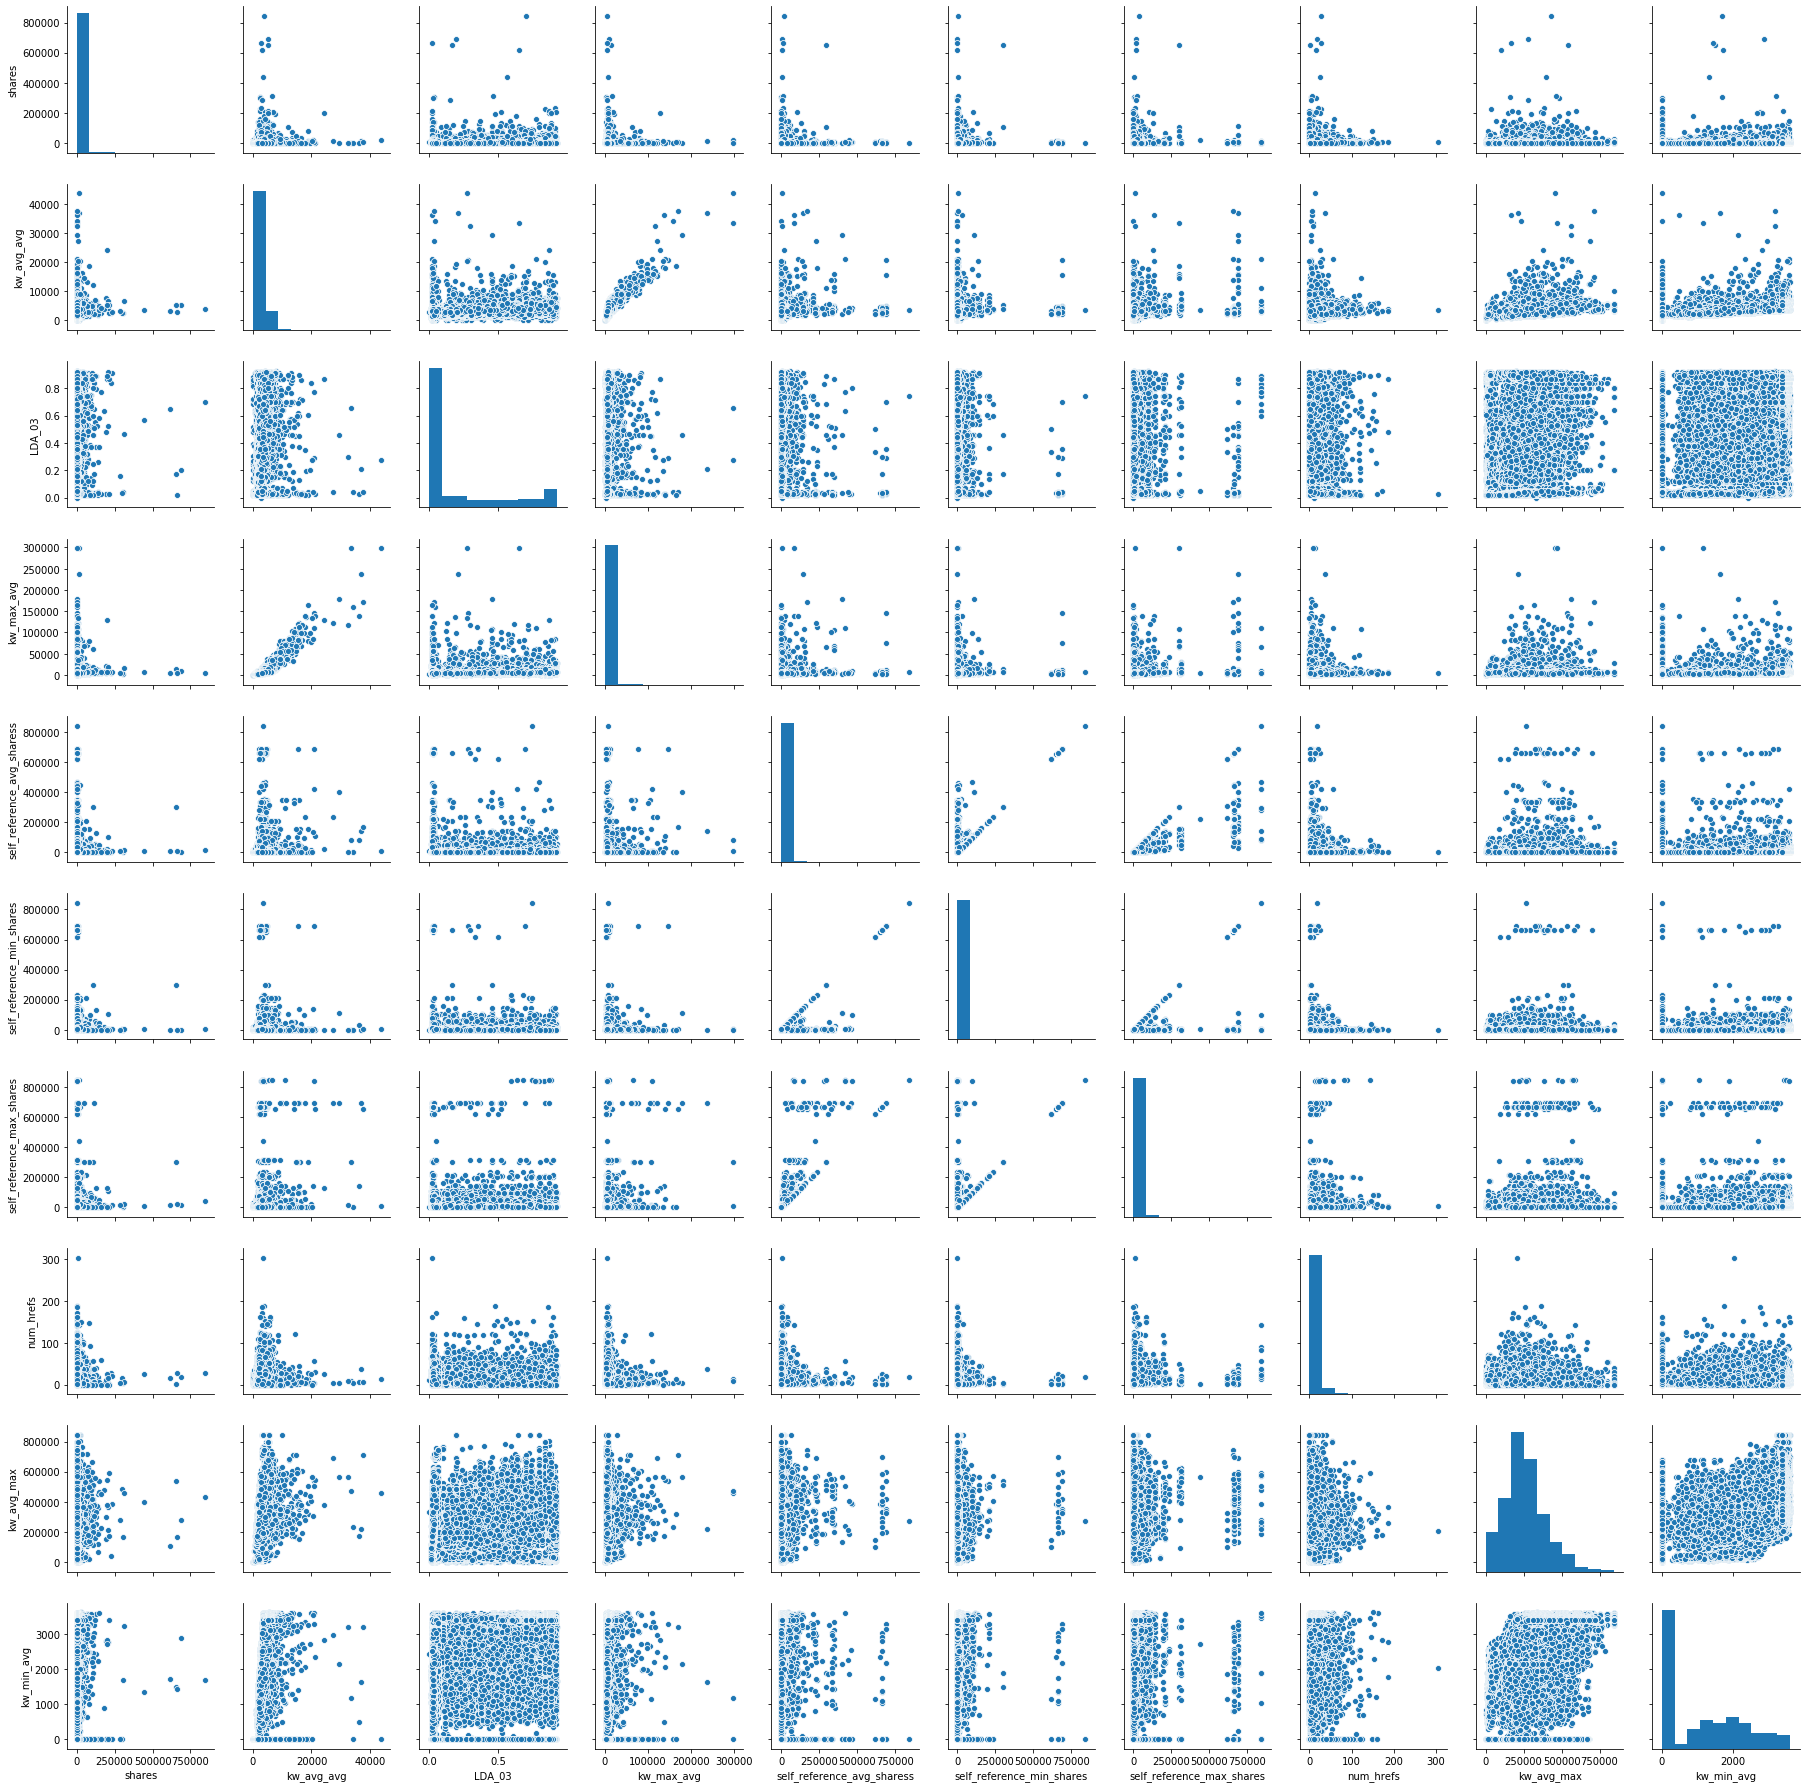

In [7]:
features = correlation_matrix['shares'].sort_values(ascending=False).head(10)

sns.pairplot(news_data[['shares', 'kw_avg_avg', 'LDA_03', 'kw_max_avg',
       'self_reference_avg_sharess', 'self_reference_min_shares',
       'self_reference_max_shares', 'num_hrefs', 'kw_avg_max', 'kw_min_avg']])

plt.show()

In [8]:
X = news_data.drop('shares',1)
y = news_data['shares']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [9]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_prediction = lr.predict(X_test)

print('r2-score : ',r2_score(y_test,lr_prediction))

r2-score :  -0.29445068550074005


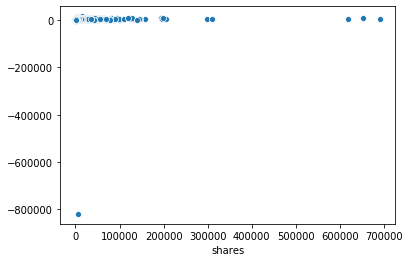

In [10]:
sns.scatterplot(y_test,lr_prediction)

In [11]:
decision_tree = DecisionTreeRegressor(random_state=10)

decision_tree.fit(X_train,y_train)
tree_prediction = decision_tree.predict(X_test)

print('r2-score : ',r2_score(y_test,tree_prediction))

r2-score :  -0.3957861538344003


In [12]:
random_forest_model = RandomForestRegressor(random_state=10)

random_forest_model.fit(X_train,y_train)
forest_pred = random_forest_model.predict(X_test)

print('r2-score : ',r2_score(y_test,forest_pred))

r2-score :  -0.10886081575825046


In [13]:
random_forest_model = RandomForestRegressor(random_state=10)

param_dist = {"max_depth": [3, 5],
              "max_features": randint(1, 11),
              "min_samples_split": randint(2, 11),
              "min_samples_leaf": randint(1, 11),
              "bootstrap": [True, False]
             }

random_search = RandomizedSearchCV(random_forest_model, param_distributions=param_dist,n_iter=10)
warnings.filterwarnings('ignore')
random_search.fit(X_train,y_train)

print('r2-score : ',r2_score(y_test,random_search.predict(X_test)))

r2-score :  0.01193399438785303


# After preprocessing

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(news_data.drop('shares',1))
news_data_preprocessed = sc.transform(news_data.drop('shares',1))
news_data_preprocessed = pd.DataFrame(news_data_preprocessed)
news_data_preprocessed = news_data_preprocessed.join(news_data.shares)
news_data_preprocessed.columns = ['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       ' data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity','shares']
news_data_preprocessed

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,1.757880,0.757447,-0.695210,0.032772,0.000675,0.038658,-0.607463,-0.335566,-0.426526,-0.304268,...,0.063865,-0.228941,-0.708369,-0.268895,-0.969886,0.671245,-0.975432,-1.810719,0.138920,593
1,1.757880,-0.661657,-0.618794,0.016056,0.000675,0.031479,-0.695709,-0.594963,-0.426526,-0.304268,...,-0.870968,-0.228941,1.102174,1.367424,0.078642,-0.870807,-0.269076,0.837749,-0.689658,711
2,1.757880,-0.661657,-0.712192,0.007645,0.000675,-0.007752,-0.695709,-0.594963,-0.426526,-0.304268,...,0.063865,0.981798,-1.621797,-0.957871,-0.270867,-0.870807,-0.269076,0.837749,-0.689658,1500
3,1.757880,-0.661657,-0.032933,-0.012619,0.000675,-0.007211,-0.166229,-0.854360,-0.426526,-0.304268,...,0.573773,0.174639,-0.862584,-0.268895,-0.620377,-0.870807,-0.269076,0.837749,-0.689658,1200
4,1.757880,1.230482,1.115439,-0.037655,0.000675,-0.045420,0.716237,4.074185,1.860061,-0.304268,...,-0.870968,0.981798,0.307944,0.075594,0.602906,0.531059,0.244637,-1.569949,-0.087056,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,-1.618083,0.284413,-0.425630,-0.005443,0.000675,-0.001346,-0.166229,0.961420,-0.426526,-0.060829,...,0.063865,-0.027151,-0.003726,0.075594,-0.183490,-0.562396,-0.269076,0.308055,-0.689658,1800
39640,-1.618083,0.757447,-0.463838,0.042060,0.000675,0.059999,-0.166229,0.961420,-0.185832,11.380809,...,0.573773,-0.228941,0.379044,0.420082,0.078642,0.054425,3.498156,-0.751332,3.729424,1900
39641,-1.618083,-0.188622,-0.221852,-0.009050,0.000675,-0.013798,1.157470,-0.594963,0.897288,-0.060829,...,0.573773,-1.036100,-0.758786,-0.957871,-0.620377,0.531059,0.244637,-1.569949,-0.087056,1900
39642,-1.618083,-2.080761,0.287592,-0.002477,0.000675,0.001068,-0.077983,-0.594963,-0.426526,-0.304268,...,-0.461978,-1.036100,0.424968,0.075594,0.996104,-0.870807,-0.269076,0.837749,-0.689658,1100


In [15]:
X = news_data_preprocessed.drop('shares',1)
y = news_data_preprocessed['shares']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)


lr = LinearRegression()
lr.fit(X_train,y_train)
lr_prediction = lr.predict(X_test)
print('r2-score for linear regression: ',r2_score(y_test,lr_prediction))
print('*'*40)

decision_tree = DecisionTreeRegressor(random_state=10)
decision_tree.fit(X_train,y_train)
tree_prediction = decision_tree.predict(X_test)
print('r2-score for Decision tree : ',r2_score(y_test,tree_prediction))
print('*'*40)

random_forest_model = RandomForestRegressor(random_state=10)
random_forest_model.fit(X_train,y_train)
forest_pred = random_forest_model.predict(X_test)
print('r2-score for forest : ',r2_score(y_test,forest_pred))
print('*'*40)

random_forest_model = RandomForestRegressor(random_state=10)
param_dist = {"max_depth": [3, 5],
              "max_features": randint(1, 11),
              "min_samples_split": randint(2, 11),
              "min_samples_leaf": randint(1, 11),
              "bootstrap": [True, False]
             }
random_search = RandomizedSearchCV(random_forest_model, param_distributions=param_dist,n_iter=10)
random_search.fit(X_train,y_train)
print('r2-score for random_forest : ',r2_score(y_test,random_search.predict(X_test)))
print('*'*40)

r2-score for linear regression:  -3812068065032485.5
****************************************
r2-score for Decision tree :  -0.5309849829685229
****************************************
r2-score for forest :  -0.1040807629206375
****************************************
r2-score for random_forest :  0.012475811336611908
****************************************


In [16]:
X = news_data.drop('shares',1)
y = news_data['shares']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)


lr = LinearRegression()
lr.fit(X_train,y_train)
lr_prediction = lr.predict(X_test)
print('r2-score for linear regression: ',r2_score(y_test,lr_prediction))
print('*'*40)

decision_tree = DecisionTreeRegressor(random_state=10)
decision_tree.fit(X_train,y_train)
tree_prediction = decision_tree.predict(X_test)
print('r2-score for Decision tree : ',r2_score(y_test,tree_prediction))
print('*'*40)

random_forest_model = RandomForestRegressor(random_state=10)
random_forest_model.fit(X_train,y_train)
forest_pred = random_forest_model.predict(X_test)
print('r2-score for forest : ',r2_score(y_test,forest_pred))
print('*'*40)

random_forest_model = RandomForestRegressor(random_state=10)
param_dist = {"max_depth": [3, 5],
              "max_features": randint(1, 11),
              "min_samples_split": randint(2, 11),
              "min_samples_leaf": randint(1, 11),
              "bootstrap": [True, False]
             }
random_search = RandomizedSearchCV(random_forest_model, param_distributions=param_dist,n_iter=10)
random_search.fit(X_train,y_train)
print('r2-score for random_forest : ',r2_score(y_test,random_search.predict(X_test)))
print('*'*40)

r2-score for linear regression:  -0.29445068550074005
****************************************
r2-score for Decision tree :  -0.3957861538344003
****************************************
r2-score for forest :  -0.10886081575825046
****************************************
r2-score for random_forest :  0.01193399438785303
****************************************
